In [2]:
import os
import sys
sys.path.extend([".", ".."])
import orjson
from nebula import JSONTokenizer, PEDynamicFeatureExtractor
from nebula.misc import getRealPath, flattenList

PATH = getRealPath(type="notebook")
ROOT = PATH + r"\.."
TRAINSET = ROOT + r"\data\data_raw\windows_emulation_trainset"
#TRAINSET = ROOT + r"\data\data_filtered\speakeasy_trainset"

subFolders = [x for x in os.listdir(TRAINSET) if x.startswith("report_")]
benignFolders = ["report_clean", "report_windows_syswow64"]

LIMIT = 100

speakeasyConfig = r"C:\Users\dtrizna\Code\nebula\emulation\_speakeasyConfig.json"
extractor = PEDynamicFeatureExtractor(speakeasyConfig=speakeasyConfig)

events = []
for subFolder in subFolders:
    fullPath = f"{TRAINSET}\\{subFolder}"
    files = [f"{fullPath}\\{x}" for x in os.listdir(fullPath) if x.endswith(".json")][:LIMIT]
    
    l = len(files)
    for i,file in enumerate(files):
        print(f"{subFolder:>20}: {i+1}/{l} {' '*30}", end="\r")
        with open(file, "r") as f:
            #reportEntryPoints = orjson.loads(f.read())
            jsonEventRecords = orjson.loads(f.read())

        # for PE path or PE bytes you can use
        #jsonEventRecords = extractor.emulate(path=path)
        #jsonEventRecords = extractor.emulate(data=bytez)

        # for entry_points from json report use
        # ~1 sec for 100 events
        jsonEventRecords = extractor.parseReportEntryPoints(jsonEventRecords)
        
        events.append(jsonEventRecords)
    print()

     report_backdoor: 100/100                               
        report_clean: 100/100                               
    report_coinminer: 100/100                               
      report_dropper: 100/100                               
    report_keylogger: 100/100                               
   report_ransomware: 100/100                               
          report_rat: 100/100                               
       report_trojan: 100/100                               
report_windows_syswow64: 100/100                               


In [3]:
VOCAB_SIZE = 1000

tokenizer = JSONTokenizer()

# takes ~50s for 91k events
eventsTokenized = tokenizer.tokenize(events)
tokenizer.buildVocab(eventsTokenized, vocabSize=VOCAB_SIZE)

if not LIMIT:
    file = f"speakeasyVocabTrainset_{VOCAB_SIZE}.pkl"
    print("Dumping vocab to {}".format(file))
    tokenizer.dumpVocab(file)


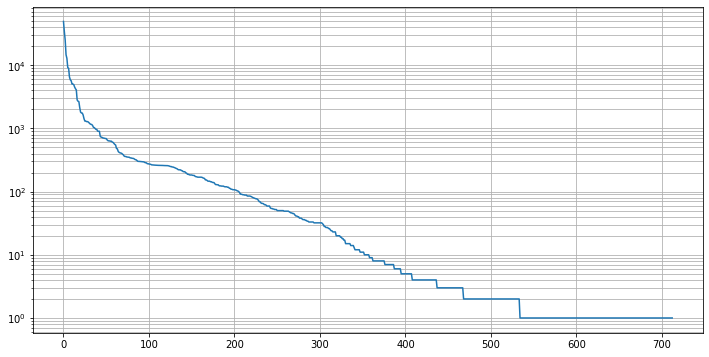

<Figure size 432x288 with 0 Axes>

In [4]:
def plotCounterCountsLineplot(counter):
    import matplotlib.pyplot as plt
    import numpy as np
    counts = [x[1] for x in counter.most_common()]
    
    plt.figure(figsize=(12,6))
    plt.plot(np.arange(len(counts)), counts)
    plt.yscale("log")
    # add ticks and grid to plot
    plt.grid(which="both")
    plt.show()
    # save to file
    plt.savefig("counterCounts.png")
plotCounterCountsLineplot(tokenizer.counter)

In [5]:
MAX_SEQ_LEN = 2048

# encode raw events
#eventsEncodedPadded = tokenizer.encode(events, maxLen=MAX_SEQ_LEN)
#eventsEncodedPadded.shape

# if already tokenized
eventsEncoded = tokenizer.convertTokenListToIds(eventsTokenized)
eventsEncodedPadded = tokenizer.padSequenceList(eventsEncoded, maxLen=MAX_SEQ_LEN)
eventsEncodedPadded.shape

(900, 2048)